
=== Processing EMD.csv ===
[INFO] Kept 5999/5999 rows
[INFO] Saved cleaned file: EMD_clean.csv


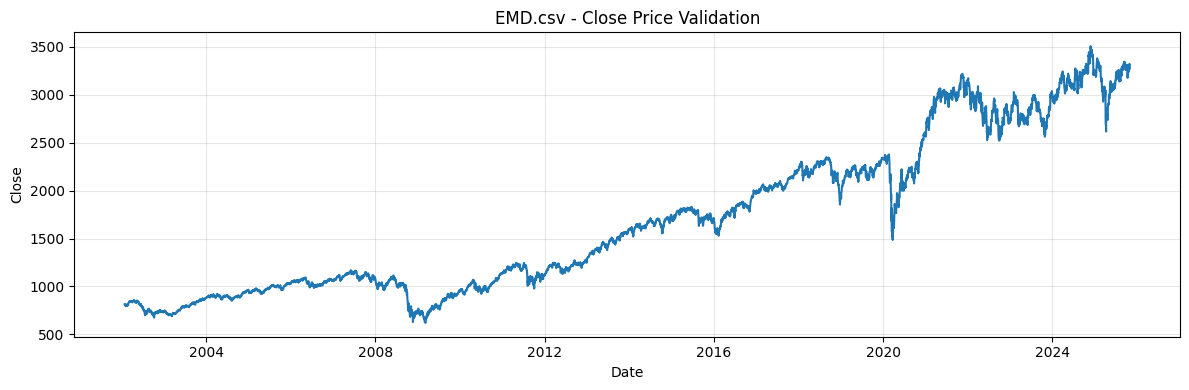


=== Processing ES.csv ===
[INFO] Kept 6315/6315 rows
[INFO] Saved cleaned file: ES_clean.csv


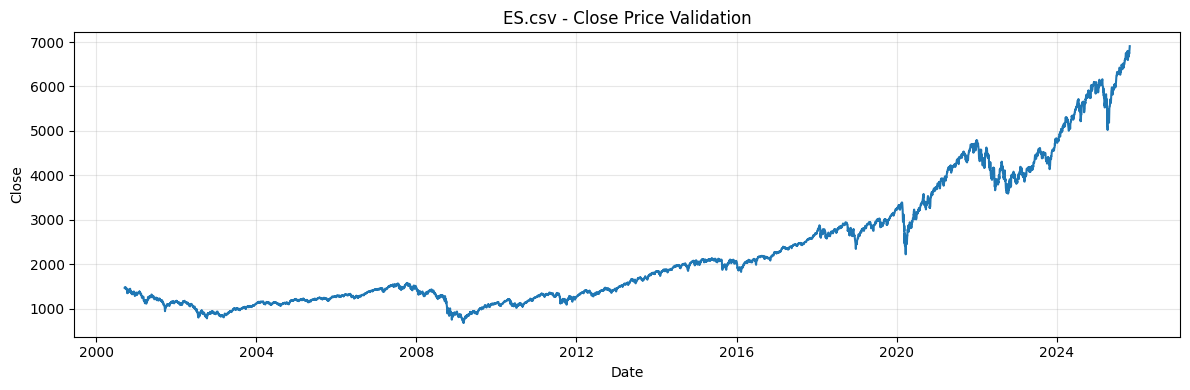


=== Processing NQ.csv ===
[INFO] Kept 6315/6315 rows
[INFO] Saved cleaned file: NQ_clean.csv


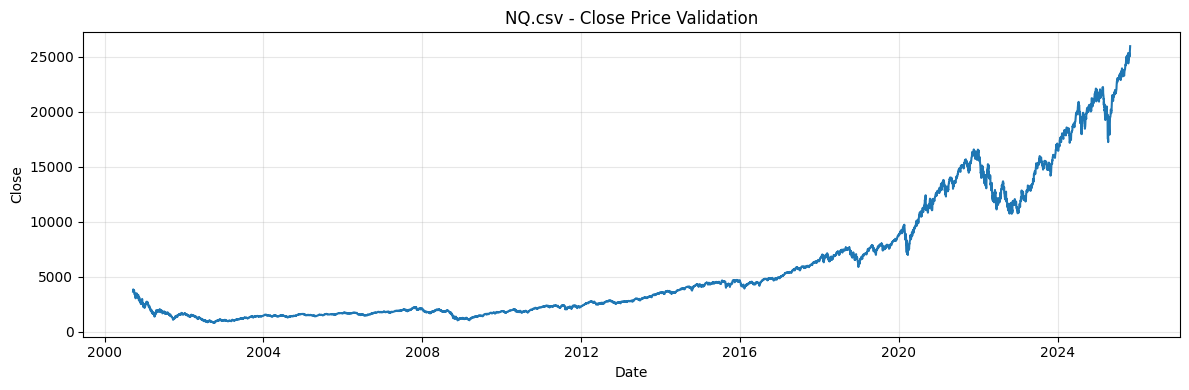


=== Processing YM.csv ===
[INFO] Kept 5930/5930 rows
[INFO] Saved cleaned file: YM_clean.csv


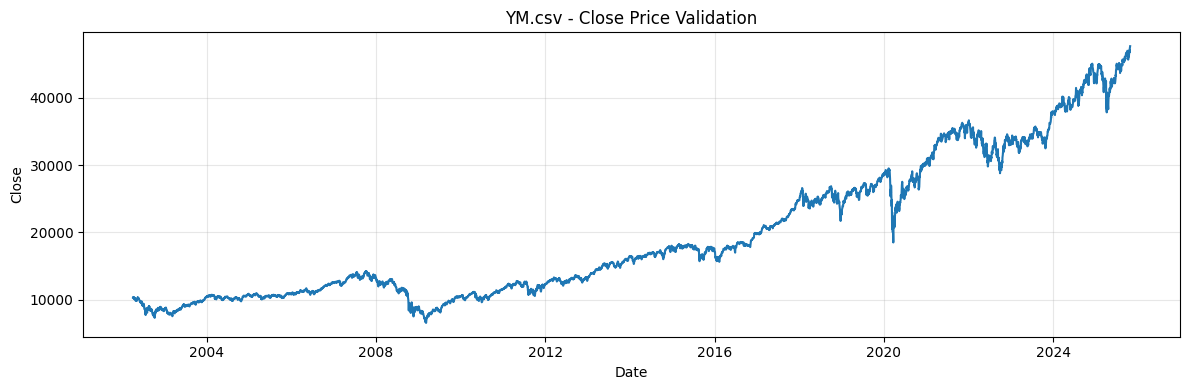

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def loader_validation():
    """
    Load each raw dataset, clean it, save it to data/clean, and plot the Close prices.
    Handles optional 'Time' column by simply ignoring it.
    """
    raw_path = Path("../data/raw")
    clean_path = Path("../data/clean")
    clean_path.mkdir(parents=True, exist_ok=True)

    cleaned_datasets = {}

    files = [f for f in raw_path.glob("*.csv") if f.name != "placeholder.csv"]
    if not files:
        print(f"[ERROR] No CSV found in {raw_path.resolve()}")
        return {}

    for csv_file in files:
        print(f"\n=== Processing {csv_file.name} ===")

        df = pd.read_csv(csv_file)
        df.columns = df.columns.str.strip().str.strip('"').str.strip("'")

        # essential columns
        required = {"Date", "Open", "High", "Low", "Close", "Vol"}
        missing = [c for c in required if c not in df.columns]
        if missing:
            print(f"[ERROR] Missing columns: {missing}")
            print(df.head())
            continue

        # Drop Time if present
        if "Time" in df.columns:
            df = df.drop(columns=["Time"])

        # Parse Date directly
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

        # numeric cleaning
        for c in ["Open", "High", "Low", "Close", "Vol"]:
            df[c] = pd.to_numeric(df[c], errors="coerce")

        before = len(df)
        df = df.dropna(subset=["Date", "Close"])
        df = df.sort_values("Date")
        print(f"[INFO] Kept {len(df)}/{before} rows")

        # Ensure 'Session' exists
        if "Session" not in df.columns:
            df["Session"] = ""

        # Final clean format
        df_out = df[["Date", "Close", "High", "Low", "Open", "Vol", "Session"]].copy()

        # Save
        clean_filename = csv_file.name.replace(".csv", "_clean.csv")
        df_out.to_csv(clean_path / clean_filename, index=False)
        print(f"[INFO] Saved cleaned file: {clean_filename}")

        # Plot
        fig = plt.figure(figsize=(12, 4))
        plt.plot(df_out["Date"], df_out["Close"])
        plt.title(f"{csv_file.name} - Close Price Validation")
        plt.xlabel("Date")
        plt.ylabel("Close")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.close(fig)

        cleaned_datasets[csv_file.name] = df_out

    return cleaned_datasets


cleaned = loader_validation()